In [4]:
import numpy as np

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Random weight initialization
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Hidden layer
        self.hidden_layer = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        
        # Output layer
        self.output = self.sigmoid(np.dot(self.hidden_layer, self.weights_hidden_output) + self.bias_output)
        
        return self.output

    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for _ in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Backpropagation
            output_error = y - output
            output_delta = output_error * self.sigmoid_derivative(output)
            
            hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
            hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer)
            
            # Weight updates
            self.weights_hidden_output += learning_rate * np.dot(self.hidden_layer.T, output_delta)
            self.bias_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
            
            self.weights_input_hidden += learning_rate * np.dot(X.T, hidden_delta)
            self.bias_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    # new function - by me (Simon)
    def MSE(self, y):
        variance = 0
        for i in range(len(y)):
            variance += pow(self.output[i] - y[i], 2)
        return variance / len(y)
    
    # altered version of 'train' method - we will return array of all bias_output values
    def train2(self, X, y, epochs=10000, learning_rate=0.1):
        biases = []
        for _ in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Backpropagation
            output_error = y - output
            output_delta = output_error * self.sigmoid_derivative(output)
            
            hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
            hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer)            
            
            # Weight updates
            self.weights_hidden_output += learning_rate * np.dot(self.hidden_layer.T, output_delta)
            self.bias_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
            # output size = 1, we have an array of arrays with single item
            # OK to to access by index [0][0]
            biases.append(self.bias_output[0][0]) 
            
            self.weights_input_hidden += learning_rate * np.dot(X.T, hidden_delta)
            self.bias_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

        return biases



In [5]:
# (a)

if __name__ == "__main__":
    # XOR problem dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    for epocs in [10, 100, 1000, 10000]:
        # Create and train neural network
        nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)
        nn.train(X, y, epochs=epocs)

        # Test predictions
        predictions = nn.forward(X)

        print("Predictions: \n{0}".format(predictions))
        print("\nTarget Values:\n", y)
        print("------------------------- END (epocs = {0}), MSE: {1}\n".format(epocs, nn.MSE(y)))

Predictions: 
[[0.61100751]
 [0.78243614]
 [0.4566317 ]
 [0.6429889 ]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (epocs = 10), MSE: [0.28233701]

Predictions: 
[[0.43268353]
 [0.32208318]
 [0.58185909]
 [0.48485897]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (epocs = 100), MSE: [0.26417907]

Predictions: 
[[0.4655048 ]
 [0.52814343]
 [0.49530003]
 [0.53039469]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (epocs = 1000), MSE: [0.24384598]

Predictions: 
[[0.02812871]
 [0.95880925]
 [0.9524453 ]
 [0.05788243]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (epocs = 10000), MSE: [0.00202493]



a - conclusions.

We calculating MSE for each run. More epocs - smaller MSE


In [6]:
# (b)

if __name__ == "__main__":
    # XOR problem dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    for learning_rate in [0.5 , 0.1  , 0.05  , 0.01  , 0.005  , 0.001]:
        # Create and train neural network
        nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)
        nn.train(X, y, learning_rate=learning_rate)

        # Test predictions
        predictions = nn.forward(X)

        print("Predictions: \n{0}".format(predictions))
        print("\nTarget Values:\n", y)
        print("------------------------- END (learning_rate = {0}), MSE: {1}\n".format(learning_rate, nn.MSE(y)))

Predictions: 
[[0.01360469]
 [0.98242775]
 [0.98450842]
 [0.01728003]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (learning_rate = 0.5), MSE: [0.00025812]

Predictions: 
[[0.04681095]
 [0.95032206]
 [0.96313724]
 [0.04937399]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (learning_rate = 0.1), MSE: [0.00211395]

Predictions: 
[[0.04304461]
 [0.89969916]
 [0.9021852 ]
 [0.12266277]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (learning_rate = 0.05), MSE: [0.00913175]

Predictions: 
[[0.33568465]
 [0.58579393]
 [0.53026078]
 [0.60327722]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (learning_rate = 0.01), MSE: [0.2172123]

Predictions: 
[[0.51738935]
 [0.49960748]
 [0.504923  ]
 [0.47762968]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]
------------------------- END (learning_rate = 0.005), MSE: [0.24782894]

Predictions: 
[[0.44023096]
 [0.40854802]
 [0.57810804]
 [0.54528757]]

Target Values:
 [[0]

b - results analysis.

Small learning rate assosiated with large MSE. Best result (smallest MSE) was observed for learning rate 0.5

Predictions:
 [[0.02993155]
 [0.95501907]
 [0.95616332]
 [0.06425228]]

Target Values:
 [[0]
 [1]
 [1]
 [0]]


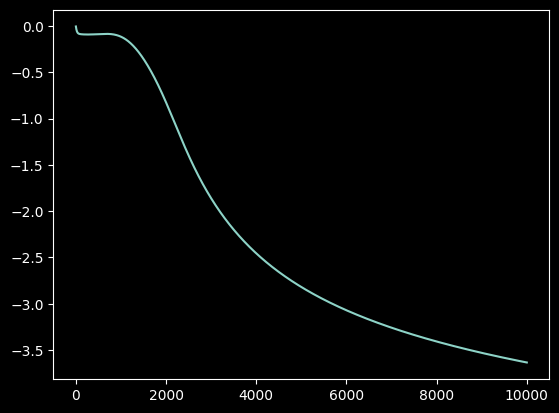

In [7]:
# c

import matplotlib.pyplot as plt

if __name__ == "__main__":
    # XOR problem dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Create and train neural network
    nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    biases = nn.train2(X, y)

    # Test predictions
    predictions = nn.forward(X)
    print("Predictions:\n", predictions)
    print("\nTarget Values:\n", y)    

    ypoints = np.array(biases)
    plt.plot(ypoints)
    
    

c - answer.

self.bias_output - is a bias value that is added to neuron output. self.bias_output updated during training.
